## Resource: 
https://github.com/ekQ/raplysaattori/blob/master/raplyzer.py

https://github.com/ekQ/raplysaattori/blob/master/phonetics.py

https://mining4meaning.com/2015/02/13/raplyzer/

https://towardsdatascience.com/generating-drake-rap-lyrics-using-language-models-and-lstms-8725d71b1b12

https://github.com/enriqueav/lstm_lyrics

make sentences and create x, y variables https://medium.com/coinmonks/word-level-lstm-text-generator-creating-automatic-song-lyrics-with-neural-networks-b8a1617104fb

webscrape: https://www.freecodecamp.org/news/how-to-scrape-websites-with-python-and-beautifulsoup-5946935d93fe/

https://stackoverflow.com/questions/42064690/using-pre-trained-word2vec-with-lstm-for-word-generation

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

https://medium.com/@enriqueav/update-automatic-song-lyrics-creator-with-word-embeddings-e30de94db8d1

https://towardsdatascience.com/how-to-build-and-deploy-a-lyrics-generation-model-framework-agnostic-589f3026fd53

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install Unidecode
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import re
from unidecode import unidecode


     |████████████████████████████████| 245kB 11.9MB/s 


In [ ]:
import random, re
import os
import io
import sys
import time
##!pip install lyricsgenius
#import lyricsgenius
#genius = lyricsgenius.Genius("DOpXjCEmTPhznrvvwOCmQl5imZKWL2ks1blJeX3EfMasg3Ah-WI083vtSHA7bCoP")

# Prepare data from picke and use word2vec to generate inputs


In [ ]:
%cd /content/drive/My Drive/ML/Songs

/content/drive/My Drive/ML/Songs


In [ ]:
import pickle
import os
import numpy as np
import itertools
import pandas as pd

curDir = r"/content/drive/My Drive/ML/try_file"
file_name = "unique_lines_safe.pkl"
os.chdir(curDir)
pickle_in = open(file_name,"rb")
df = pickle.load(pickle_in)

verse_line_list= pd.DataFrame(df)

verse_line_list.columns =['verse']

In [ ]:
import re, string 
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
%matplotlib inline


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text
    # Remove a sentence if it is only one word long
    #if len(text) > 2:
    #return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean = pd.DataFrame(verse_line_list.verse.apply(lambda x: clean_text(x)))


In [ ]:
df_clean.shape

(398803, 1)

In [ ]:
df_clean = pd.DataFrame(df_clean.verse[0:150000])
df_clean.head()

,verse
0,palm angels on my body it protect me from my d...
1,but im a piranha piranha
2,but when i slip inside i turn girls into slip ...
3,aint no ifs ands or buts
4,and i aint join your team cause i got my own g...


In [ ]:
df_clean.isnull().sum()

verse    0
dtype: int64

In [ ]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def lemmatizer(verse):        
    sent = []
    doc = nlp(verse)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["verse_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['verse']), axis=1)

In [ ]:
df_clean.head()

,verse
0,palm angels on my body it protect me from my d...
1,but im a piranha piranha
2,but when i slip inside i turn girls into slip ...
3,aint no ifs ands or buts
4,and i aint join your team cause i got my own g...


In [ ]:
length_list = list()
for i in range(len(df_clean.verse)):
  x = len(df_clean.verse[i].split())
  length_list.append(x)
df_verse_len_check = pd.concat([df_clean.verse, pd.Series(length_list, name='sentence_length' )], axis=1, sort=False)
df_verse_len_check

,verse,sentence_length
0,palm angels on my body it protect me from my d...,11
1,but im a piranha piranha,5
2,but when i slip inside i turn girls into slip ...,12
3,aint no ifs ands or buts,6
4,and i aint join your team cause i got my own g...,12
...,...,...
149995,and all hell i started studying my idols,8
149996,so many decisions,3
149997,stayin strapped forever trapped in this drug life,8
149998,i hope you dont just want me for my lifestyle ...,12


In [ ]:
top20_len = df_verse_len_check.sentence_length.sort_values(ascending=False)[0:20]
top20_len


38492     16
101563    16
113700    15
16951     15
41853     15
99778     15
105944    15
83177     15
146900    15
129922    15
124804    15
7207      15
126262    15
893       15
9145      15
28417     15
99780     15
126256    15
49826     15
139371    15
Name: sentence_length, dtype: int64

In [ ]:

df_clean['verse_lemmatize_clean'] = df_clean['verse_lemmatize'].str.replace('-PRON-', '')

## Plot the top 20 words with most frequency.

In [ ]:

sentences = [row.split() for row in df_clean['verse']]

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1


      


In [ ]:
freq = pd.DataFrame([[k] + [v] for k, v in word_freq.items()], 
                   columns=['words', 'freq'])



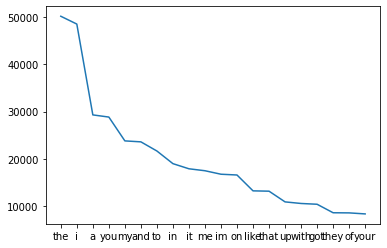

In [ ]:
import matplotlib.pyplot as plt
pl = freq.sort_values(by=['freq'], ascending=False).iloc[0:20,:]

plt.plot(pl.words, pl.freq)


In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:20]

['the',
 'i',
 'a',
 'you',
 'my',
 'and',
 'to',
 'in',
 'it',
 'me',
 'im',
 'on',
 'like',
 'that',
 'up',
 'with',
 'got',
 'they',
 'of',
 'your']

In [ ]:
# min_count: minimum number of occurrences of a word in the corpus to be included in the model.
# window: the maximum distance between the current and predicted word within a sentence.
# size: the dimensionality of the feature vectors
# workers: I know my system is having 4 cores, 
w2v_model = Word2Vec(min_count=1,
                     window=5,
                     size=300,
                     workers=4)

In [ ]:
w2v_model.build_vocab(sentences)

In [ ]:
# train word vectors
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(4729821, 6367085)

In [ ]:
# As we do not plan to train the model any further, 
# we are calling init_sims(), which will make the model much more memory-efficient
w2v_model.init_sims(replace=True)

In [ ]:
pretrained_weights = w2v_model.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


## Split sentences as train_x and train_y. train_x is the sentence except the last word. train_y is the last word of teh sentence. 


In [ ]:
def word2idx(word):
  return w2v_model.wv.vocab[word].index
def idx2word(idx):
  return w2v_model.wv.index2word[idx]

In [ ]:
## find the max sentence length
ll= list()
for i, sentence in enumerate(sentences):
  x = len(sentences[i])
  ll.append(x)
max(ll)


16

In [ ]:
max_sentence_len=16
x = np.zeros([len(sentences), max_sentence_len], dtype=np.int32)
y = np.zeros([len(sentences)], dtype=np.int32)
for i, sentence in enumerate(sentences):
  for t, word in enumerate(sentence[:-1]):
    x[i, t] = word2idx(word)
    y[i] = word2idx(sentence[-1])
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (150000, 16)
y shape: (150000,)


# Embedding Wordvec2 model in LSTM

In [ ]:
from keras.callbacks import LambdaCallback
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping

embedding_layer = Embedding(input_dim=vocab_size, output_dim=emdedding_size, 
                    weights=[pretrained_weights])

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(w2v_model.wv.syn0.shape[1]))
model.add(Dense(w2v_model.wv.syn0.shape[0]))   

model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [ ]:
def sample(preds, temperature=1.0):
  if temperature <= 0:
    return np.argmax(preds)
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

def generate_next(text, num_generated=10):
  word_idxs = [word2idx(word) for word in text.lower().split()]
  for i in range(num_generated):
    prediction = model.predict(x=np.array(word_idxs))[0]
    idx = sample(prediction, temperature=0.7)
    word_idxs.append(idx)
  return ' '.join(idx2word(idx) for idx in word_idxs)

In [ ]:
#!pip install h5py
early_stopping =EarlyStopping(monitor='loss',mode = "min",  verbose = 1, patience=7)
filepath = "Word2vecLSTM_weights.hdf5"
model_checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, mode='min', save_best_only=True, save_weights_only=True)

his= model.fit(x, y,
          batch_size=128,
          epochs=100,
          shuffle=True, 
          callbacks=[early_stopping, model_checkpoint])

#LambdaCallback(on_epoch_end=on_epoch_end)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
150000/150000 [==============================] - 68s 450us/step - loss: 8.3670 - accuracy: 0.0282

Epoch 00001: loss improved from inf to 8.36700, saving model to Word2vecLSTM_weights.hdf5
Epoch 2/100
150000/150000 [==============================] - 68s 453us/step - loss: 7.5418 - accuracy: 0.0577

Epoch 00002: loss improved from 8.36700 to 7.54182, saving model to Word2vecLSTM_weights.hdf5
Epoch 3/100
150000/150000 [==============================] - 70s 467us/step - loss: 6.9146 - accuracy: 0.0819

Epoch 00003: loss improved from 7.54182 to 6.91460, saving model to Word2vecLSTM_weights.hdf5
Epoch 4/100
150000/150000 [==============================] - 71s 470us/step - loss: 6.3566 - accuracy: 0.0996

Epoch 00004: loss improved from 6.91460 to 6.35659, saving model to Word2vecLSTM_weights.hdf5
Epoch 5/100
150000/150000 [==============================] - 69s 461us/step - loss: 5.8048 - accuracy: 0.1203

Epoch 00005: loss improved from 6.35659 to 5.80481, saving model to Word2

In [ ]:
print("Hyperparameters")
print("Data size: ", df_clean.shape[0])
print("Epochs: ",100 )
print('Early Stopping', 86)
print("Batch size: ", 128)

print("Layers: ", len(model.layers))
print("Loss: ", his.history["loss"][-1])
print("Accuracy: ", his.history["accuracy"][-1])

Hyperparameters
Data size:  150000
Epochs:  100
Early Stopping 86
Batch size:  128
Layers:  4
Loss:  0.14213323646704357
Accuracy:  0.96309334


In [ ]:
# save model
import json
import optparse

# serialize model to JSON
final_json = model.to_json()
with open("word2vec_LSTM.json", "w") as json_file:
    json_file.write(final_json)
# serialize weights to HDF5
model.save_weights("word2vec_LSTM_model.h5")
print("Saved model to ")


Saved model to 


In [ ]:
def validate_seed(vocabulary, seed):
    """Validate that all the words in the seed are part of the vocabulary"""
    print("\nValidating that all the words in the seed are part of the vocabulary: ")
    seed_words = seed
    valid = True
    for w in seed_words:
        print(w, end="")
        if w in vocabulary:
            print(" ✓ in vocabulary")
        else:
            print(" ✗ NOT in vocabulary")
            valid = False
    return valid


In [ ]:
#generate lyrics with a seed:
seed = ['hi', 'angel', 'sun', 'love', 'girl', 'when', 'boy', 'that', 'sky', 'today', 'why', 'in', 'no']
validate_seed(w2v_model.wv.vocab, [w for w in seed])


Validating that all the words in the seed are part of the vocabulary: 
hi ✓ in vocabulary
angel ✓ in vocabulary
sun ✓ in vocabulary
love ✓ in vocabulary
girl ✓ in vocabulary
when ✓ in vocabulary
boy ✓ in vocabulary
that ✓ in vocabulary
sky ✓ in vocabulary
today ✓ in vocabulary
why ✓ in vocabulary
in ✓ in vocabulary
no ✓ in vocabulary


True

In [ ]:
def generate_lyrics(text, num_generated):
  word_idxs = [word2idx(word) for word in text.lower().split()]
  for i in range(num_generated):
    prediction = model.predict(x=word_idxs)[0]
    idx = sample(prediction, temperature=0.7)
    word_idxs.append(idx)
  return ' '.join(idx2word(idx) for idx in word_idxs)

In [ ]:
from random import randint

lyrics = []
for i in range(len(seed)): 
    x=generate_lyrics(seed[i] , randint(5,15))
    lyrics.append(x)
    lyrics = list(lyrics)
lyrics

['hi murked kickback murked murked permanent murked murked murked intimidated intimidated',
 'angel to chanel to superman to drop keep everything respect crack order',
 'sun ha open knot grin connect open ha cellular ha ha ha devise',
 'love life curtains life meeks life curb life lucci life luminati life gangland life jacks',
 'girl salad hot truth ooh ruggedness',
 'when dine shaq february armor i february hilfiger judas shes pill aliens',
 'boy letterman barking trigga ow blasts skates bullish smirk hah perignon',
 'that what jack lean what toasters pump mine deal paranoid what',
 'sky peek im hook transactions brawl malcolm im im im im im speaker terrace im',
 'today yard yard drinking yard files yard yard guilty yard yard files yard yard',
 'why by blue recoup damaged late',
 'in gun gun gun gun gun gun gun gun gun gun gun',
 'no flop secretary icy legitimate glistening damn supportive gunship dope cheap fouls dope twentyone']

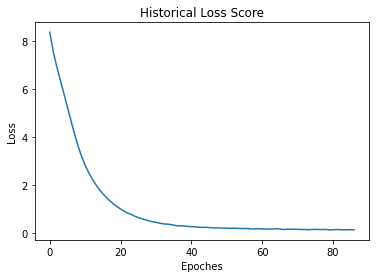

In [ ]:
plt.plot(his.history['loss'])
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.title('Historical Loss Score')
plt.show()

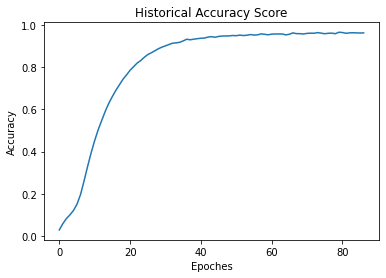

In [ ]:
plt.plot(his.history['accuracy'])
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.title('Historical Accuracy Score')
plt.show()

## Test the rhyme density

In [ ]:
import codecs
import re
import numpy as np
import os
!pip install pyphonetics
import pyphonetics as ph

In [ ]:

class ph:

    def is_vow(c, language='fi'):
        '''
        Is the given (lowercase) character a vowel or not.
        '''
        if language == 'fi': # Finnish
            return c in u'aeiouyäöå'

        elif len(language) >= 2 and language[:2] == 'en': # English
            # In order to increase recall for the rhyme detection, we 
            # ignore the schwa vowel '@' as it can be rhymed with several
            # different vowels. However, in BattleBot we do not ignore it
            # in order to get a higher precision.
            return c in u'3L5aAeEiI0VuUoO'

        else:
            raise Exception("Unknown language: %s" % language)

    def map_vow(c, language):
        '''
        Map vowel to a similar sounding vowel (only for English).
        '''
        # This list is somewhat arbitrary, so some native English speaker 
        # who knows about phonetics might be able to improve it.
        vow_map = {
                '0':'o',
                'O':'o',
                'I':'i',
                'E':'e'
                }
        if len(language) >= 2 and language[:2] == 'en' and c in vow_map:
            return vow_map[c]
        else:
            return c

    def is_space(c):
        '''
        Is the given character a space or newline (other space characters are 
        cleaned in the preprocessing phase).
        '''
        return c==' ' or c=='\n'

    def get_phonetic_transcription(text, language='en-us', output_fname=None):
        if output_fname is None:
            fname2 = u'temp_transcription.txt'
        else:
            fname2 = output_fname

        if output_fname is None or not os.path.exists(fname2):
            print ("Transcribing: %s" % fname2)
            fname = u'temp_lyrics.txt'
            f = codecs.open(fname, 'w', 'utf8')
            f.write(text)
            f.close()

            cmd = u'espeak -xq -v%s -f %s > %s' % (language, fname, fname2)
            os.system(cmd)

        f2 = codecs.open(fname2, 'r', 'utf8')
        new_text = f2.read()

        # Remove some unwanted stuff from the transcription
        new_text = re.sub("_:'Ekskl@m,eIS@n_:", "", new_text)
        new_text = re.sub("'", "", new_text)
        new_text = re.sub(",", "", new_text)
        return new_text

In [ ]:
class Lyrics:
    '''
    This class is used to store and preprocess rap lyrics and calculate
    statistics like average rhyme length out of the lyrics.
    '''

    def __init__(self, filename=None, print_stats=False, text=None, 
                 language='fi', lookback=10):
        '''
        Lyrics can be read from the file (default) or passed directly
        to this constructor.
        '''
        self.text_raw = None
        # How many previous words are checked for a rhyme.
        self.lookback = lookback
        if filename is not None:
            self.filename = filename
            f = codecs.open(filename, 'r', 'utf8')
            self.text_raw = f.read()
            f.close()
        elif text is not None:
            self.text_raw = text
            self.filename = 'No filename'
        self.language = language

        if self.text_raw is not None:
            cleaning_ok = self.clean_text(self.text_raw)
            self.compute_vowel_representation()
            self.avg_rhyme_length, self.longest_rhyme = self.rhyme_stats()

            if print_stats:
                #self.print_song_stats_compact()
                self.print_song_stats()

    def clean_text(self, text):
        '''
        Preprocess text by removing unwanted characters and duplicate rows.
        '''
        if self.language == 'fi':
            self.text = text.lower()
            # Replace all but word characters and newlines by spaces
            rx = re.compile(u'[^\wåäö\n]+')
        else: # English
            self.text = text
            # For English we need to keep apostrophes since they affect the 
            # pronunciation
            rx = re.compile(u"[^\wåÅäÄöÖéÉ'’\.\?!\n]+")

        self.text = rx.sub(' ', self.text)
        # If there are more than 2 consecutive newlines, remove some of them
        # (just to make the cleaned text look prettier)
        self.text = re.sub('\n\n+', '\n\n', self.text)
        # Remove duplicate rows
        self.lines = self.text.split('\n')

        uniq_lines = set()
        new_text = ''
        for l in self.lines:
            l = l.strip()
            if len(l) > 0 and l in uniq_lines:
                continue
            # Remove lines that are within brackets/parenthesis
            if len(l) >= 2 and ((l[0]=='[' and l[-1]==']') or (l[0]=='(' and l[-1]==')')):
                continue
            uniq_lines.add(l)
            if self.language == 'fi':
                new_text += l + '\n'
            else: # English
                # Add '.' to the end of line since otherwise the lines might be
                # too long so that espeak won't transcribe the whole line
                new_text += l + '.\n'

        self.text = new_text

    def compute_vowel_representation(self):
        '''
        Compute a representation of the lyrics where only vowels are preserved.
        '''
        self.vow = [] # Lyrics with all but vowels removed
        self.vow_idxs = [] # Indices of the vowels in self.text list
        self.word_ends = [] # Indices of the last characters of each word
        self.words = [] # List of words in the lyrics
        self.line_idxs = []

        if len(self.language) >= 2 and self.language[:2] == 'en':
            self.text_orig = self.text
            self.text = ph.get_phonetic_transcription(self.text, output_fname=self.filename+'.ipa')
            self.word_ends_orig = []
            self.words_orig = []

        prev_space_idx = -1 # Index of the previous space char
        line_idx = 0 # Line index of the current character
        # Go through the lyrics char by char
        for i in range(len(self.text)):
            self.line_idxs.append(line_idx)
            c = self.text[i]
            c = ph.map_vow(c, self.language)
            if ph.is_vow(c, self.language):
                # Ignore double vowels
                # (in English this applies probably only to 'aa' as in 'bath'
                # which rhymes with 'trap' that has only 'a')
                if i > 0 and self.text[i-1] == c:
                    # Index of a double vowel points to the latter occurrence
                    self.vow_idxs[-1] = i
                    continue
                # TODO Diftongs should not be split (i.e. "price" should
                # not rhyme with "trap kit"). This has been fixed in BattleBot
                self.vow.append(c)
                self.vow_idxs.append(i)
            elif ph.is_space(c):
                if c in '\n':
                    line_idx += 1
                elif c in '.!?' and i < len(self.text)-1 and self.text[i+1] != '\n':
                    line_idx += 1
                # If previous char was not a space, we've encountered word end
                if len(self.vow) > 0 and not ph.is_space(self.text[i-1]):
                    # Put together the new word. Potential consonants in the 
                    # end are ignored
                    new_word = self.text[prev_space_idx+1:self.vow_idxs[-1]+1]
                    # Check that the new word contains at least one vowel
                    no_vowels = True
                    for c2 in new_word:
                        if ph.is_vow(c2, self.language):
                            no_vowels = False
                            break
                    if no_vowels:
                        prev_space_idx = i
                        continue
                    self.word_ends.append(len(self.vow)-1)
                    self.words.append(new_word)
                prev_space_idx = i

        if len(self.language) >= 2 and self.language[:2] == 'en':
            self.lines_orig = self.text_orig.split('\n')

    def rhyme_length(self, wpos2):
        '''
        Length of rhyme (in vowels). The latter part of the rhyme ends with 
        word self.words[wpos2].
        Input:
            wpos2       Word index of the end of the rhyme.
        '''
        max_length = 0
        max_wpos1 = None
        wpos1 = max(0,wpos2-self.lookback)
        while wpos1 < wpos2:
            rl = self.rhyme_length_fixed(wpos1, wpos2)
            if rl > max_length:
                max_length = rl
                max_wpos1 = wpos1
            wpos1 += 1
        return max_length, max_wpos1

    def rhyme_length_fixed(self, wpos1, wpos2):
        '''
        Length of rhyme (in vowels). The first part of the rhyme ends with 
        self.words[wpos1] and the latter part with word self.words[wpos2].
        Input:
            wpos1       Word index of the last word in the first part of the rhyme.
            wpos2       Word index of the end of the rhyme.
        '''
        if wpos1 < 0: # Don't wrap
            return 0
        elif self.words[wpos1] == self.words[wpos2]:
            return 0
        # Indices in the vowel list
        p1 = self.word_ends[wpos1]
        p2 = self.word_ends[wpos2]
        l = 0
        while self.vow[p1-l] == self.vow[p2-l]:
            # Make sure that exactly same words are not used
            if wpos1 > 0 and p1-l <= self.word_ends[wpos1-1] and wpos2 > 0 and p2-l <= self.word_ends[wpos2-1]:
                # Get the first and last character indices of the words surrounding the vowels at p1-l and p2-l
                prev_s1 = self.vow_idxs[p1-l]
                while prev_s1 > 0 and not ph.is_space(self.text[prev_s1-1]):
                    prev_s1 -= 1
                prev_s2 = self.vow_idxs[p2-l]
                while prev_s2 > 0 and not ph.is_space(self.text[prev_s2-1]):
                    prev_s2 -= 1
                next_s1 = self.vow_idxs[p1-l]
                while next_s1 < len(self.text)-1 and not ph.is_space(self.text[next_s1+1]):
                    next_s1 += 1
                next_s2 = self.vow_idxs[p2-l]
                while next_s2 < len(self.text)-1 and not ph.is_space(self.text[next_s2+1]):
                    next_s2 += 1
                if next_s1-prev_s1 == next_s2-prev_s2 and self.text[prev_s1:next_s1+1] ==  self.text[prev_s2:next_s2+1]:
                    break

            l += 1
            if p1-l < 0 or p2-l <= p1:
                break
        # Ignore rhymes with length 1
        if l == 1:
            l = 0
        return l

    def rhyme_stats(self):
        '''
        Compute the average rhyme length of the song and the longest rhyme.
        Output:
            Average rhyme length (float)
            Longest rhyme which is a 3-tuple with: 
                (length, word index of the first part of the rhyme,
                         word index of the latter part of the rhyme)
        '''
        # Rhyme length of each word
        rls = []
        # Keep track of the longest rhyme
        max_rhyme = (0,None,None)
        for wpos2 in range(1,len(self.word_ends)):
            (rl, wpos1) = self.rhyme_length(wpos2)
            rls.append(rl)
            if rl > max_rhyme[0]:
                max_rhyme = (rl, wpos1, wpos2)
        rls = np.array(rls)
        # Average rhyme length of the song
        if len(rls) > 0:
            avg_rl = np.mean(rls)
        else:
            avg_rl = 0
        return avg_rl, max_rhyme

    def get_avg_rhyme_length(self):
        return self.avg_rhyme_length

    def print_song_stats(self):
        print ('------------------------------------------')
        print ("%s\n" % self.filename)

        print ("Avg rhyme length: %.3f\n" % self.avg_rhyme_length)

        self.print_rhyme(self.longest_rhyme)
        print
        #print '------------------------------------------'

    def print_song_stats_compact(self):
        print ("%.3f  %s" % (self.avg_rhyme_length, self.filename))

    def print_rhyme(self, rhyme_tuple):
        print (self.get_rhyme_str(rhyme_tuple))

    def get_rhyme_str(self, rhyme_tuple):
        '''
        Construct a string of a given rhyme tuple.
        '''
        ret = ''
        rl, wpos1, wpos2 = rhyme_tuple
        if wpos1 is None or wpos2 is None:
            return ''
        p2 = self.vow_idxs[self.word_ends[wpos2]]
        p2_orig = p2
        # Find the ending of the last word
        while not ph.is_space(self.text[p2]):
            p2 += 1
        p0 = self.vow_idxs[self.word_ends[wpos1]-rl]
        p0_orig = p0
        # Find the beginning of the line
        while self.text[p0] != '\n' and p0 > 0:
            p0 -= 1

        cap_line = ''
        rw1, rw2 = self.get_rhyming_vowels(rhyme_tuple)
        for i in range(p0,p2+1):
            if self.language == 'fi':
                if i in rw1 or i in rw2:
                    cap_line += self.text[i].capitalize()
                else:
                    cap_line += self.text[i]
            else:
                if i == min(rw1) or i == min(rw2):
                    cap_line += ' | ' + self.text[i]
                elif i == max(rw1) or i == max(rw2):
                    cap_line += self.text[i] + '|'
                else:
                    cap_line += self.text[i]
        ret += "Longest rhyme (l=%d): %s\n" % (rl, cap_line)
        if self.language != 'fi':
            # Get the corresponding lines from the original lyrics
            line_beg = self.line_idxs[p0]
            line_end = self.line_idxs[p2]
            for i in range(line_beg, line_end+1):
                if i < len(self.lines_orig):
                    ret += self.lines_orig[i] + '\n'
        return ret

    def get_longest_rhyme(self):
        rhyme_str = self.get_rhyme_str(self.longest_rhyme)
        rhyme_str += self.filename + '\n'
        return self.longest_rhyme[0], rhyme_str

    def get_rhyming_vowels(self, rhyme_tuple):
        '''
        Return the indices of the rhyming vowels of the longest rhyme.
        Output:
            Tuple with the indices of the first part and the second part of
            the rhyme separately.
        '''
        rl, wpos1, wpos2 = rhyme_tuple
        if wpos1 is None or wpos2 is None:
            return ([-1],[-1])

        # The first part of the rhyme
        rhyme_idxs1 = [] # Indices of the rhyming vowels
        n_caps = 0
        p = self.vow_idxs[self.word_ends[wpos1]]
        while n_caps < rl:
            if ph.is_vow(self.text[p], self.language):
                rhyme_idxs1.append(p)
                # Increase the counter only if the vowel is not a double vowel
                if self.text[p] != self.text[p+1]:
                    n_caps += 1
            p -= 1

        # The second part of the rhyme
        rhyme_idxs2 = [] # Indices of the rhyming vowels
        n_caps = 0
        p = self.vow_idxs[self.word_ends[wpos2]]
        p_last = p
        while n_caps < rl:
            if ph.is_vow(self.text[p], self.language):
                rhyme_idxs2.append(p)
                # Increase the counter only if the vowel is not a double vowel.
                # The last vowel must be always counted.
                if p == p_last or self.text[p] != self.text[p+1]:
                    n_caps += 1
            p -= 1

        return (rhyme_idxs1, rhyme_idxs2)

In [ ]:
with open('lyric.txt', 'w') as file:

    for item in lyrics:
        file.write('%s\n' %item)
        
        

In [ ]:
x=Lyrics("lyric.txt")
x.get_avg_rhyme_length()

0.5629139072847682